Customer Retention. (Analysis)

Below analysis are based on following files:

1.Customer_retention_case_study
 2.Customer_retention_dataset

In [2]:
#Imoporting neccecory Libraries:

#common lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preprocessing lib:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

#outliers lib:
from scipy import stats

#multicolliniarity lib:
from sklearn.feature_selection import SelectKBest,f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score

#Model building lib 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

#model evaluation lib:
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,confusion_matrix,plot_roc_curve

#model hyper parameter tuning lib:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [30]:
#importing the Dataframe
df=pd.read_excel('customer_retention_dataset.xlsx')
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [31]:
#removing the extra space from the colums in the dataframe
df=df.rename(columns=lambda x: x.strip())

In [32]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


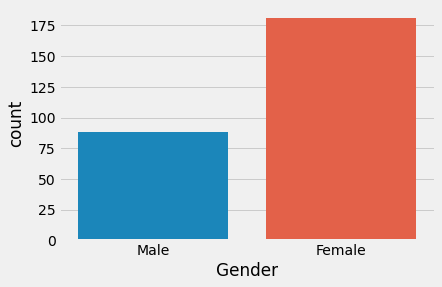

In [50]:
#Plotting the count plot to check label data
sns.countplot(x='1Gender of respondent',data=df)
plt.xlabel('Gender')
plt.show()

In [ ]:
#from the graph it is clear that there is more online shoppling is done by female as compare to male.

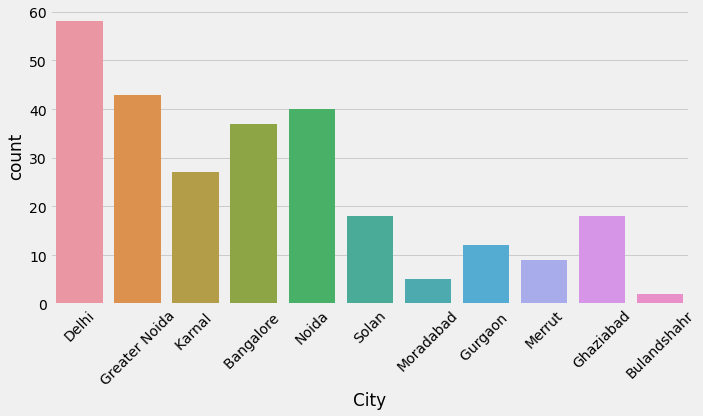

In [70]:
#Plotting the count plot to check label data
plt.figure(figsize=(10,6))
sns.countplot(x='3 Which city do you shop online from?',data=df)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.tight_layout()
plt.show()

In [ ]:
#As per the graph details Delhi city has maximum shopping rate as compare to other cities.

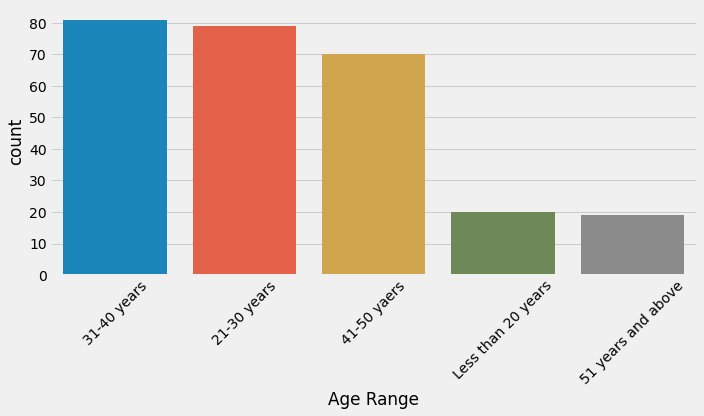

In [75]:
#Plotting the count plot to check label data
plt.figure(figsize=(10,6))
sns.countplot(x='2 How old are you?',data=df)
plt.xticks(rotation=45)
plt.xlabel('Age Range')
plt.tight_layout()
plt.show()

In [ ]:
#As per the graph The maximun shopping is done by the age range between 21 to 40 years.

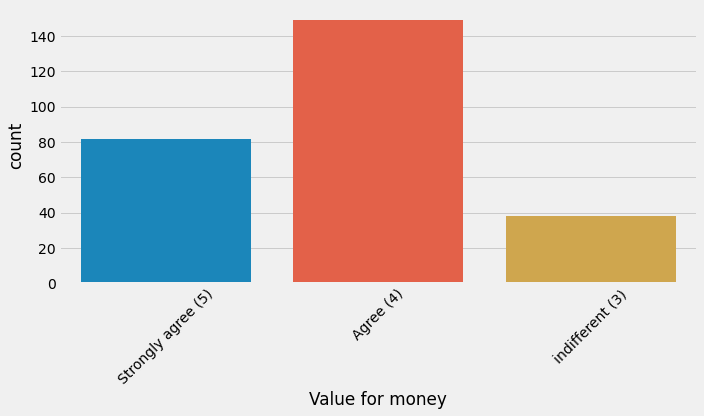

In [77]:
#Plotting the count plot to check label data
plt.figure(figsize=(10,6))
sns.countplot(x='47 Getting value for money spent',data=df)
plt.xticks(rotation=45)
plt.xlabel('Value for money')
plt.tight_layout()
plt.show()

In [ ]:
#The most of the review is strongly agree and agree means max are happy with the e-commerce purchase.

In [73]:
#plotting fruad value count
#plt.style.use('fivethirtyeight')
#fig = plt.figure(figsize=(10,6))
#ax = df.groupby('3 Which city do you shop online from?').1Gender of respondent.count().plot.bar(ylim=0)
#ax.set_ylabel('Fraud reported')
#plt.show()

In [74]:
#plotting the graph for age vs froud report
#plt.rcParams['figure.figsize'] = [15, 8]
#ax=plt.style.use('fivethirtyeight')
#table=pd.crosstab(df.2 How old are you?,df.1Gender of respondent)
#table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
#plt.title('Stacked Bar Chart of Age vs gender count',fontsize=10)
#plt.xlabel('Age')
#plt.ylabel('gender count')
#plt.show()

In [44]:
#display all the rows from the dataframe
pd.set_option('display.max_rows',None)

In [7]:
df.shape
#there is 269 rows and 71 columns is availble in the data

(269, 71)

In [8]:
df.info()
#the dataframe having only the object datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                        --------------  ----- 
 0   1Gender of respondent                                                                                         269 non-null    object
 1   2 How old are you?                                                                                            269 non-null    object
 2   3 Which city do you shop online from?                                                                         269 non-null    object
 3   4 What is the Pin Code of where you shop online from?                                                         269 non-null    int64 
 4   5 Since How Long You are Shopping Online ?                    

In [9]:
#checking null value from the dataframe
df.isnull().sum()

1Gender of respondent                                                                                           0
2 How old are you?                                                                                              0
3 Which city do you shop online from?                                                                           0
4 What is the Pin Code of where you shop online from?                                                           0
5 Since How Long You are Shopping Online ?                                                                      0
6 How many times you have made an online purchase in the past 1 year?                                           0
7 How do you access the internet while shopping on-line?                                                        0
8 Which device do you use to access the online shopping?                                                        0
9 What is the screen size of your mobile device?                                        

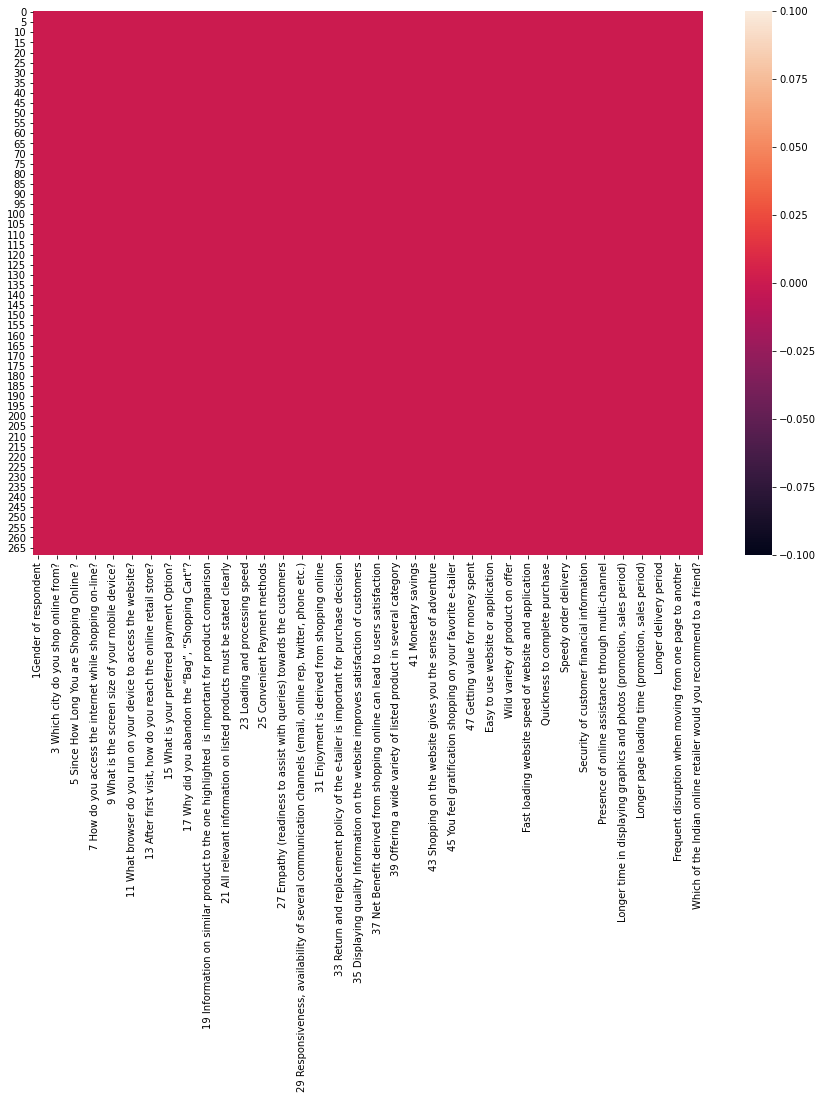

In [10]:
#there is no null value available in the dataframe.cross checking the same with the heatmap.
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())
plt.show()

In [11]:
#describe the dataframe
df.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


In [12]:
#As all the features are catagerical so in the describe method only once feature has been available.

In [13]:
#encoding the feature using label encoder
lb=LabelEncoder()
df['1Gender of respondent']=lb.fit_transform(df['1Gender of respondent'])

In [14]:
#using ordinal encoder to encode the categorical data into ordinal form 
ord_enc=OrdinalEncoder(categories=[['Less than 20 years','21-30 years','31-40 years','41-50 yaers','51 years and above'],['Less than 1 year','1-2 years','2-3 years','3-4 years','Above 4 years'],['Less than 10 times','11-20 times','21-30 times','31-40 times','41 times and above','42 times and above'],
                                  ['Smartphone','Laptop','Desktop','Tablet'],['Window/windows Mobile','Android','IOS/Mac'],['Google chrome','Safari','Mozilla Firefox','Opera'],['Less than 1 min','1-5 mins','6-10 mins','11-15 mins','more than 15 mins'],['Change in price','Better alternative offer','Lack of trust','No preferred mode of payment','Promo code not applicable']])
df_ord=ord_enc.fit_transform(df[['2 How old are you?','5 Since How Long You are Shopping Online ?','6 How many times you have made an online purchase in the past 1 year?','8 Which device do you use to access the online shopping?','10 What is the operating system (OS) of your device?',
                             '11 What browser do you run on your device to access the website?','14 How much time do you explore the e- retail store before making a purchase decision?','17 Why did you abandon the “Bag”, “Shopping Cart”?']])

In [15]:
#checking the df_ord values
df_ord

array([[2., 4., 3., ..., 0., 2., 2.],
       [1., 4., 4., ..., 0., 4., 4.],
       [1., 3., 4., ..., 0., 3., 4.],
       ...,
       [3., 2., 0., ..., 0., 4., 1.],
       [0., 2., 0., ..., 0., 1., 3.],
       [3., 2., 3., ..., 0., 3., 4.]])

In [16]:
df[['2 How old are you?','5 Since How Long You are Shopping Online ?','6 How many times you have made an online purchase in the past 1 year?','8 Which device do you use to access the online shopping?','10 What is the operating system (OS) of your device?',
                             '11 What browser do you run on your device to access the website?','14 How much time do you explore the e- retail store before making a purchase decision?','17 Why did you abandon the “Bag”, “Shopping Cart”?']] = df_ord

In [17]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,1,2.0,Delhi,110009,4.0,3.0,Dial-up,2.0,Others,0.0,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,0,1.0,Delhi,110030,4.0,4.0,Wi-Fi,0.0,4.7 inches,2.0,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,0,1.0,Greater Noida,201308,3.0,4.0,Mobile Internet,0.0,5.5 inches,1.0,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,1,1.0,Karnal,132001,3.0,0.0,Mobile Internet,0.0,5.5 inches,2.0,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,0,1.0,Bangalore,530068,2.0,1.0,Wi-Fi,0.0,4.7 inches,2.0,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [18]:
#checking the value count of features
df['13 After first visit, how do you reach the online retail store?'].value_counts()

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: 13 After first visit, how do you reach the online retail store?, dtype: int64

In [19]:
#replcing the 5 inches with the 5.5 inches to get desired output
df['9 What is the screen size of your mobile device?']=df['9 What is the screen size of your mobile device?'].replace('5 inches','5.5 inches')

#replcing the Social Media with the Search Engine to get desired output
df['13 After first visit, how do you reach the online retail store?']=df['13 After first visit, how do you reach the online retail store?'].replace('Social Media','Search Engine')

In [20]:
df['13 After first visit, how do you reach the online retail store?'].value_counts()

Search Engine      95
Via application    86
Direct URL         70
E-mail             18
Name: 13 After first visit, how do you reach the online retail store?, dtype: int64

In [21]:
#using replace method to replace catagorical value to the numerical values:
df=df.replace({'7 How do you access the internet while shopping on-line?':{'Mobile internet':3,'Wi-Fi':2,'Mobile Internet':5,'Dial-up':4}})
df=df.replace({'9 What is the screen size of your mobile device?':{'Others':5,'5.5 inches':4,'4.7 inches':2}})
df=df.replace({'12 Which channel did you follow to arrive at your favorite online store for the first time?':{'Search Engine':1,'Content Marketing':3,'Display Adverts':4}})
df=df.replace({'13 After first visit, how do you reach the online retail store?':{'Search Engine':1,'Via application':4,'Direct URL':3,'E-mail':2}})
df=df.replace({'15 What is your preferred payment Option?':{'Credit/Debit cards':1,'Cash on delivery (CoD)':2,'E-wallets (Paytm, Freecharge etc.)':4}})
df=df.replace({'16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?':{'Sometimes':3,'Never':1,'Frequently':4,'Very frequently':5}})
df=df.replace({'18 The content on the website must be easy to read and understand':{'Strongly agree (5)':5,'Agree (4)':4,'Strongly disagree (1)':1,'Indifferent (3)':3}})
df=df.replace({'19 Information on similar product to the one highlighted  is important for product comparison':{'Strongly agree (5)':5,'Agree (4)':4,'Indifferent (3)':3,'Dis-agree (2)':2}})
df=df.replace({'20 Complete information on listed seller and product being offered is important for purchase decision.':{'Agree (4)':4,'Strongly agree (5)':5,'Dis-agree (2)':2,'Strongly disagree (1)':1,'Indifferent (3)':3}})
df=df.replace({'21 All relevant information on listed products must be stated clearly':{'Strongly agree (5)':5,'Agree (4)':4,'Indifferent (3)':3,'Dis-agree (2)':2,'Strongly disagree (1)':1,'Indifferent (3)':3}})
df=df.replace({'22 Ease of navigation in website':{'Strongly agree (5)':5,'Agree (4)':4,'Strongly disagree (1)':1,'Dis-agree (2)':2}})
df=df.replace({'23 Loading and processing speed':{'Strongly agree (5)':5,'Agree (4)':4,'Indifferent (3)':3,'Dis-agree (2)':2,'Strongly disagree (1)':1}})
df=df.replace({'24 User friendly Interface of the website':{'Strongly agree (5)':5,'Agree (4)':4,'Indifferent (3)':3,'Dis-agree (2)':2,'Strongly disagree (1)':1}})
df=df.replace({'25 Convenient Payment methods':{'Strongly agree (5)':5,'Agree (4)':4,'Dis-agree (2)':2}})
df=df.replace({'26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent  (3)':3,'Disagree (2)':2}})
df=df.replace({'27 Empathy (readiness to assist with queries) towards the customers':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Strongly disagree (1)':1}})
df=df.replace({'28 Being able to guarantee the privacy of the customer':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3}})
df=df.replace({'29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Strongly disagree (1)':1}})
df=df.replace({'30 Online shopping gives monetary benefit and discounts':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Dis-agree (2)':2,'Strongly disagree (1)':1}})
df=df.replace({'31 Enjoyment is derived from shopping online':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Dis-agree (2)':2,'Strongly disagree (1)':1}})
df=df.replace({'32 Shopping online is convenient and flexible':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Dis-agree (2)':2}})
df=df.replace({'33 Return and replacement policy of the e-tailer is important for purchase decision':{'Strongly agree (5)':5,'Agree (4)':4,'Dis-agree (2)':2}})
df=df.replace({'34 Gaining access to loyalty programs is a benefit of shopping online':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Dis-agree (2)':2,'Strongly disagree (1)':1}})
df=df.replace({'35 Displaying quality Information on the website improves satisfaction of customers':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3}})
df=df.replace({'36 User derive satisfaction while shopping on a good quality website or application':{'Strongly agree (5)':5,'Agree (4)':4,'Dis-agree (2)':2}})
df=df.replace({'37 Net Benefit derived from shopping online can lead to users satisfaction':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Dis-agree (2)':2}})
df=df.replace({'38 User satisfaction cannot exist without trust':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Dis-agree (2)':2,'Strongly disagree (1)':1}})
df=df.replace({'39 Offering a wide variety of listed product in several category':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Dis-agree (2)':2}})
df=df.replace({'40 Provision of complete and relevant product information':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Disagree (2)':2}})
df=df.replace({'41 Monetary savings':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Disagree (2)':2}})
df=df.replace({'42 The Convenience of patronizing the online retailer':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3}})
df=df.replace({'43 Shopping on the website gives you the sense of adventure':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Dis-agree (2)':2,'Strongly disagree (1)':1}})
df=df.replace({'44 Shopping on your preferred e-tailer enhances your social status':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Dis-agree (2)':2,'Strongly disagree (1)':1}})
df=df.replace({'45 You feel gratification shopping on your favorite e-tailer':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Disagree (2)':2,'Strongly disagree (1)':1}})
df=df.replace({'46 Shopping on the website helps you fulfill certain roles':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3,'Dis-agree (2)':2,'Strongly disagree (1)':1}})
df=df.replace({'47 Getting value for money spent':{'Strongly agree (5)':5,'Agree (4)':4,'indifferent (3)':3}})

In [22]:
#checking the encoded data with replace
df.iloc[:,5:47].head()

,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,11 What browser do you run on your device to access the website?,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
0,3.0,4,2.0,5,0.0,0.0,1,1,2.0,4,...,5,3,3,2,3,4,4,5,4,5
1,4.0,2,0.0,2,2.0,0.0,1,4,4.0,1,...,5,5,5,5,3,3,3,5,5,5
2,4.0,5,0.0,4,1.0,0.0,1,4,3.0,4,...,4,5,5,5,4,4,4,3,3,4
3,0.0,5,0.0,4,2.0,1.0,1,1,2.0,1,...,4,4,4,5,4,4,5,4,3,4
4,1.0,2,0.0,2,2.0,1.0,3,4,4.0,1,...,5,4,4,5,4,3,1,5,1,5


In [23]:
#fetching the code excel data to check the values which has to covcert
df1=pd.read_excel('customer_retention_dataset.xlsx',sheet_name='codedsheet')
df1=df1.rename(columns=lambda x: x.strip())

In [24]:
df1.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [25]:
#16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?
df1['9 What is the screen size of your mobile device?'].value_counts()

5    134
4    106
2     29
Name: 9 What is the screen size of your mobile device?, dtype: int64

In [26]:
#filtering the numerical values into the another dataframe to plot the graph.
df2=df.iloc[:,:47]
df2.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
0,1,2.0,Delhi,110009,4.0,3.0,4,2.0,5,0.0,...,5,3,3,2,3,4,4,5,4,5
1,0,1.0,Delhi,110030,4.0,4.0,2,0.0,2,2.0,...,5,5,5,5,3,3,3,5,5,5
2,0,1.0,Greater Noida,201308,3.0,4.0,5,0.0,4,1.0,...,4,5,5,5,4,4,4,3,3,4
3,1,1.0,Karnal,132001,3.0,0.0,5,0.0,4,2.0,...,4,4,4,5,4,4,5,4,3,4
4,0,1.0,Bangalore,530068,2.0,1.0,2,0.0,2,2.0,...,5,4,4,5,4,3,1,5,1,5


In [27]:
#dropping one caegerical value from the dataset
df2=df2.drop(columns=['3 Which city do you shop online from?'],index=1)
df2.head()

,1Gender of respondent,2 How old are you?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,11 What browser do you run on your device to access the website?,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
0,1,2.0,110009,4.0,3.0,4,2.0,5,0.0,0.0,...,5,3,3,2,3,4,4,5,4,5
2,0,1.0,201308,3.0,4.0,5,0.0,4,1.0,0.0,...,4,5,5,5,4,4,4,3,3,4
3,1,1.0,132001,3.0,0.0,5,0.0,4,2.0,1.0,...,4,4,4,5,4,4,5,4,3,4
4,0,1.0,530068,2.0,1.0,2,0.0,2,2.0,1.0,...,5,4,4,5,4,3,1,5,1,5
5,0,2.0,201308,4.0,4.0,2,0.0,4,1.0,0.0,...,5,5,5,5,5,5,3,3,4,5


In [ ]:
#The use full column details are used for the analyisis:
#1Gender of respondent                                                                                           
#2 How old are you?                                                                                              
#3 Which city do you shop online from?                                                                           
#4 What is the Pin Code of where you shop online from?                                                           
#5 Since How Long You are Shopping Online ?                                                                      
#6 How many times you have made an online purchase in the past 1 year?
#24 User friendly Interface of the website                                                                       
#25 Convenient Payment methods 

#Thses are some columns which is fulful for the data analysis and provide the information about it.

In [ ]:
#Unwanted columns which is not useful and give no impact:
#8 Which device do you use to access the online shopping?                                                        
#9 What is the screen size of your mobile device?                                                                
#10 What is the operating system (OS) of your device?                                                            
#11 What browser do you run on your device to access the website?   
#23 Loading and processing speed
#44 Shopping on your preferred e-tailer enhances your social status 

#these are the columns which does not impact on the data analysis.means it is unwanted columns.

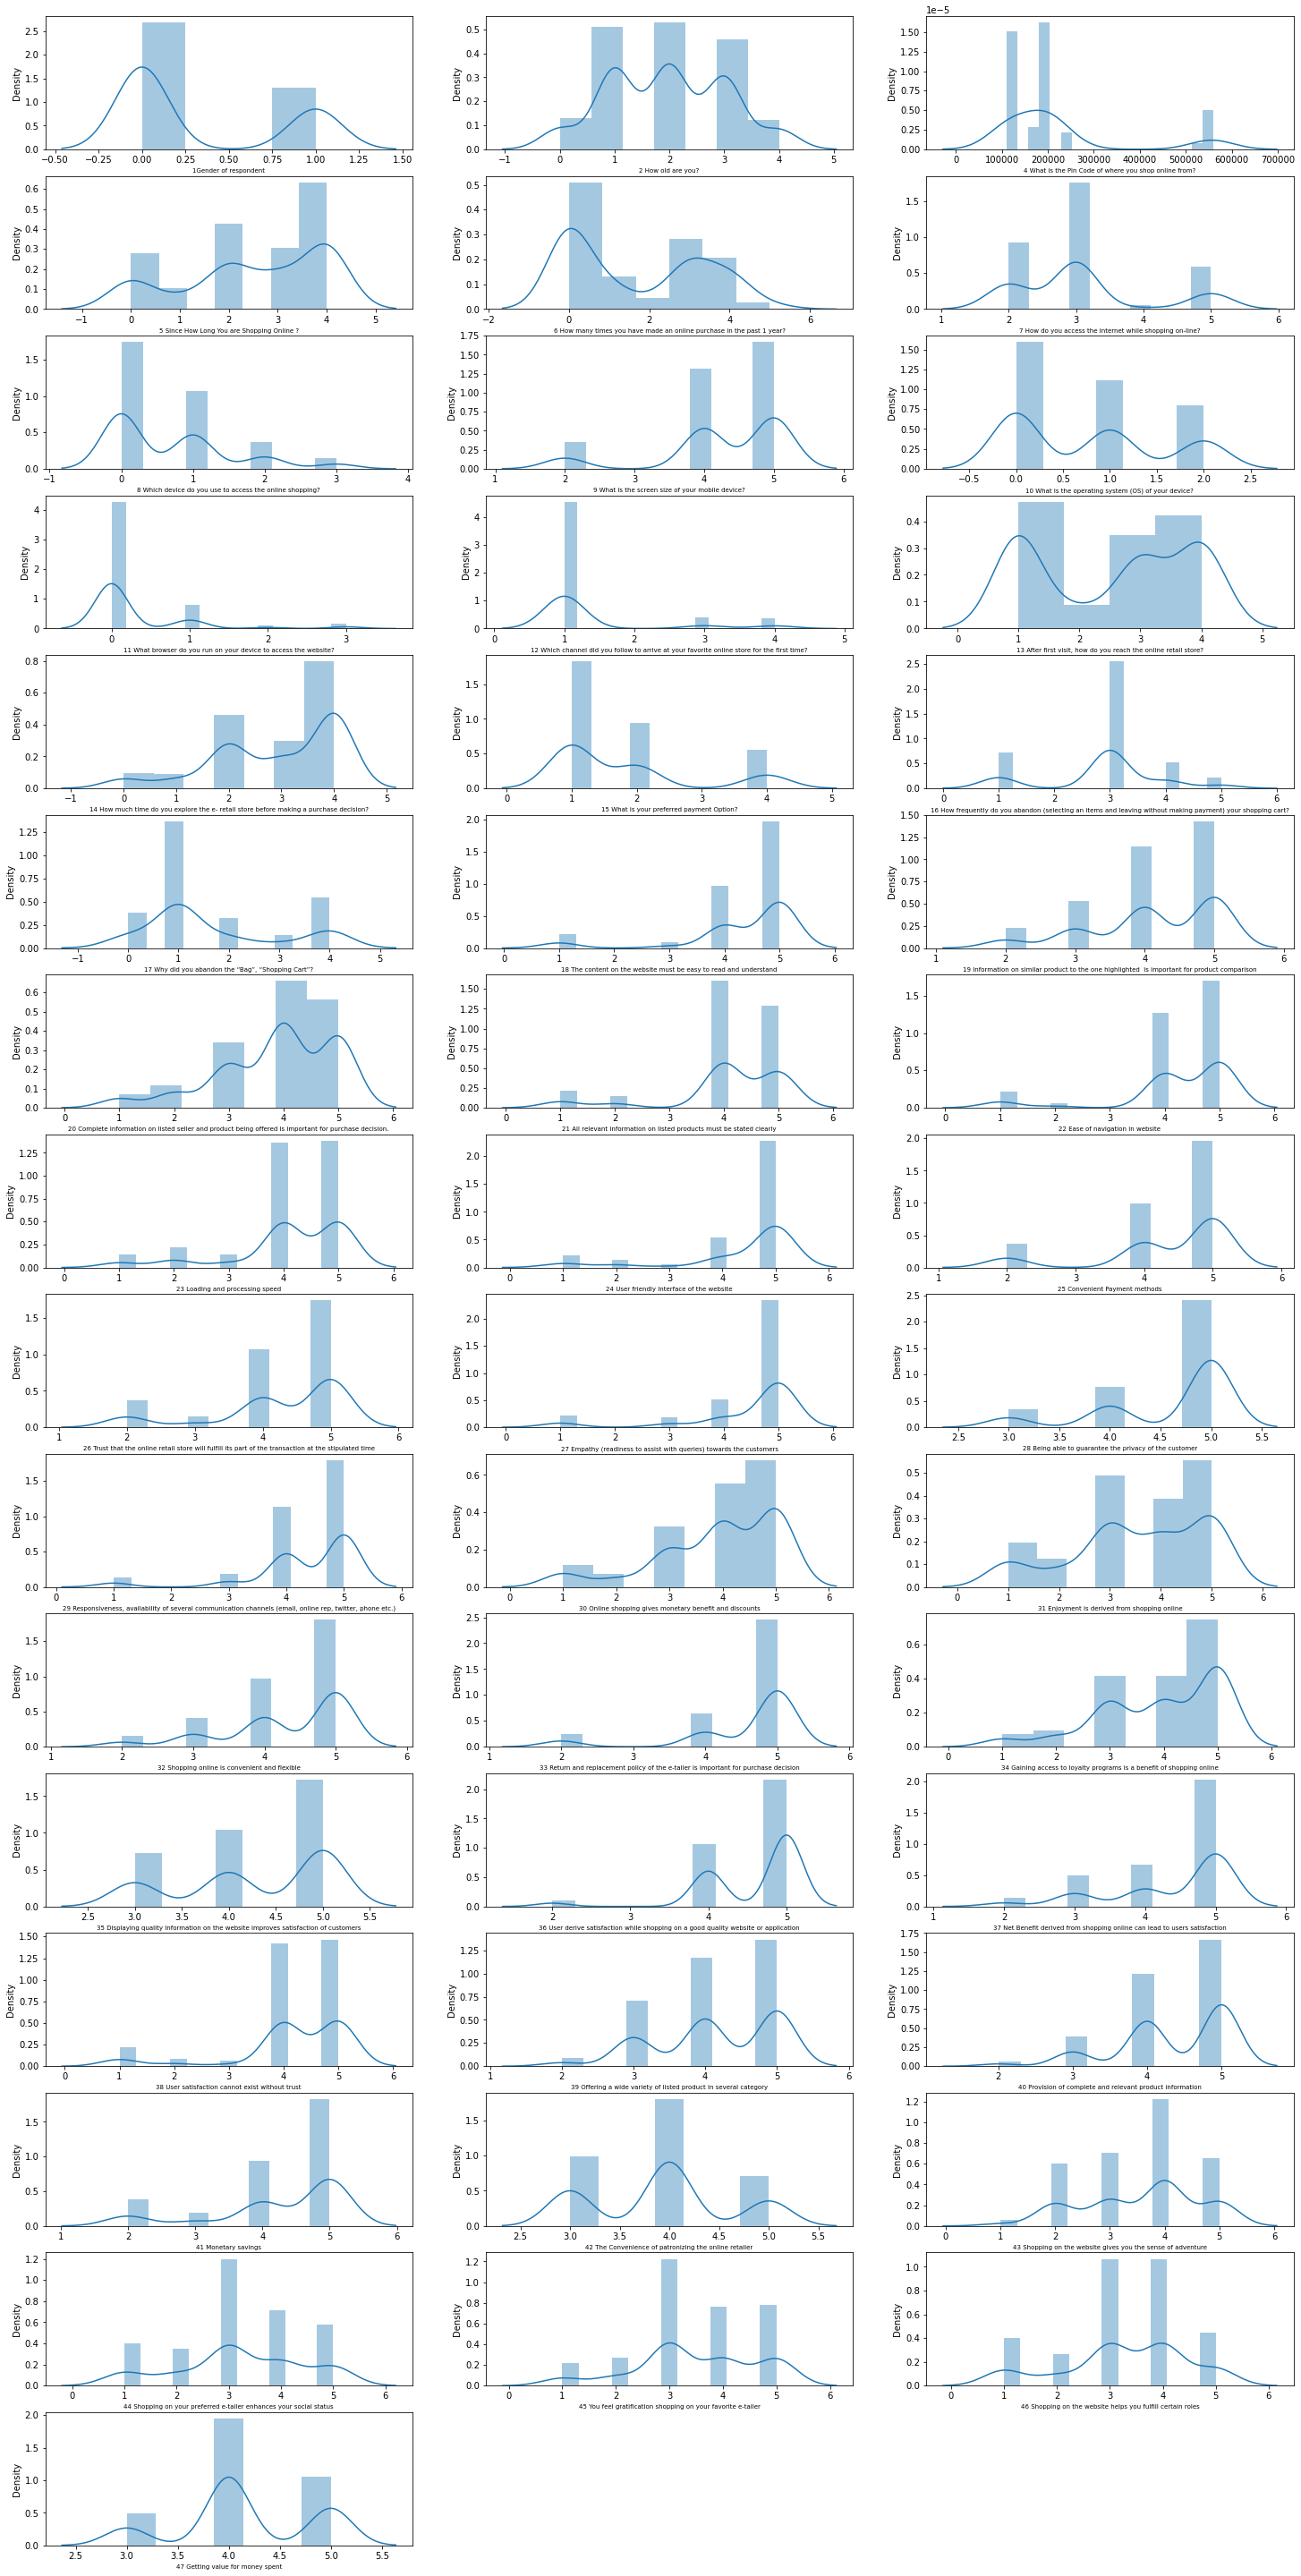

In [36]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(25,52),facecolor='white')
pltnum=1

for column in df2:
    if pltnum <= 48:
        plt.subplot(16,3,pltnum)
        sns.distplot(df2[column])
        plt.xlabel(column,fontsize=7)
        
    pltnum +=1
plt.show()    

In [ ]:
#The data distribution looks normal using the distplot.there is no outliers looks in the columns.

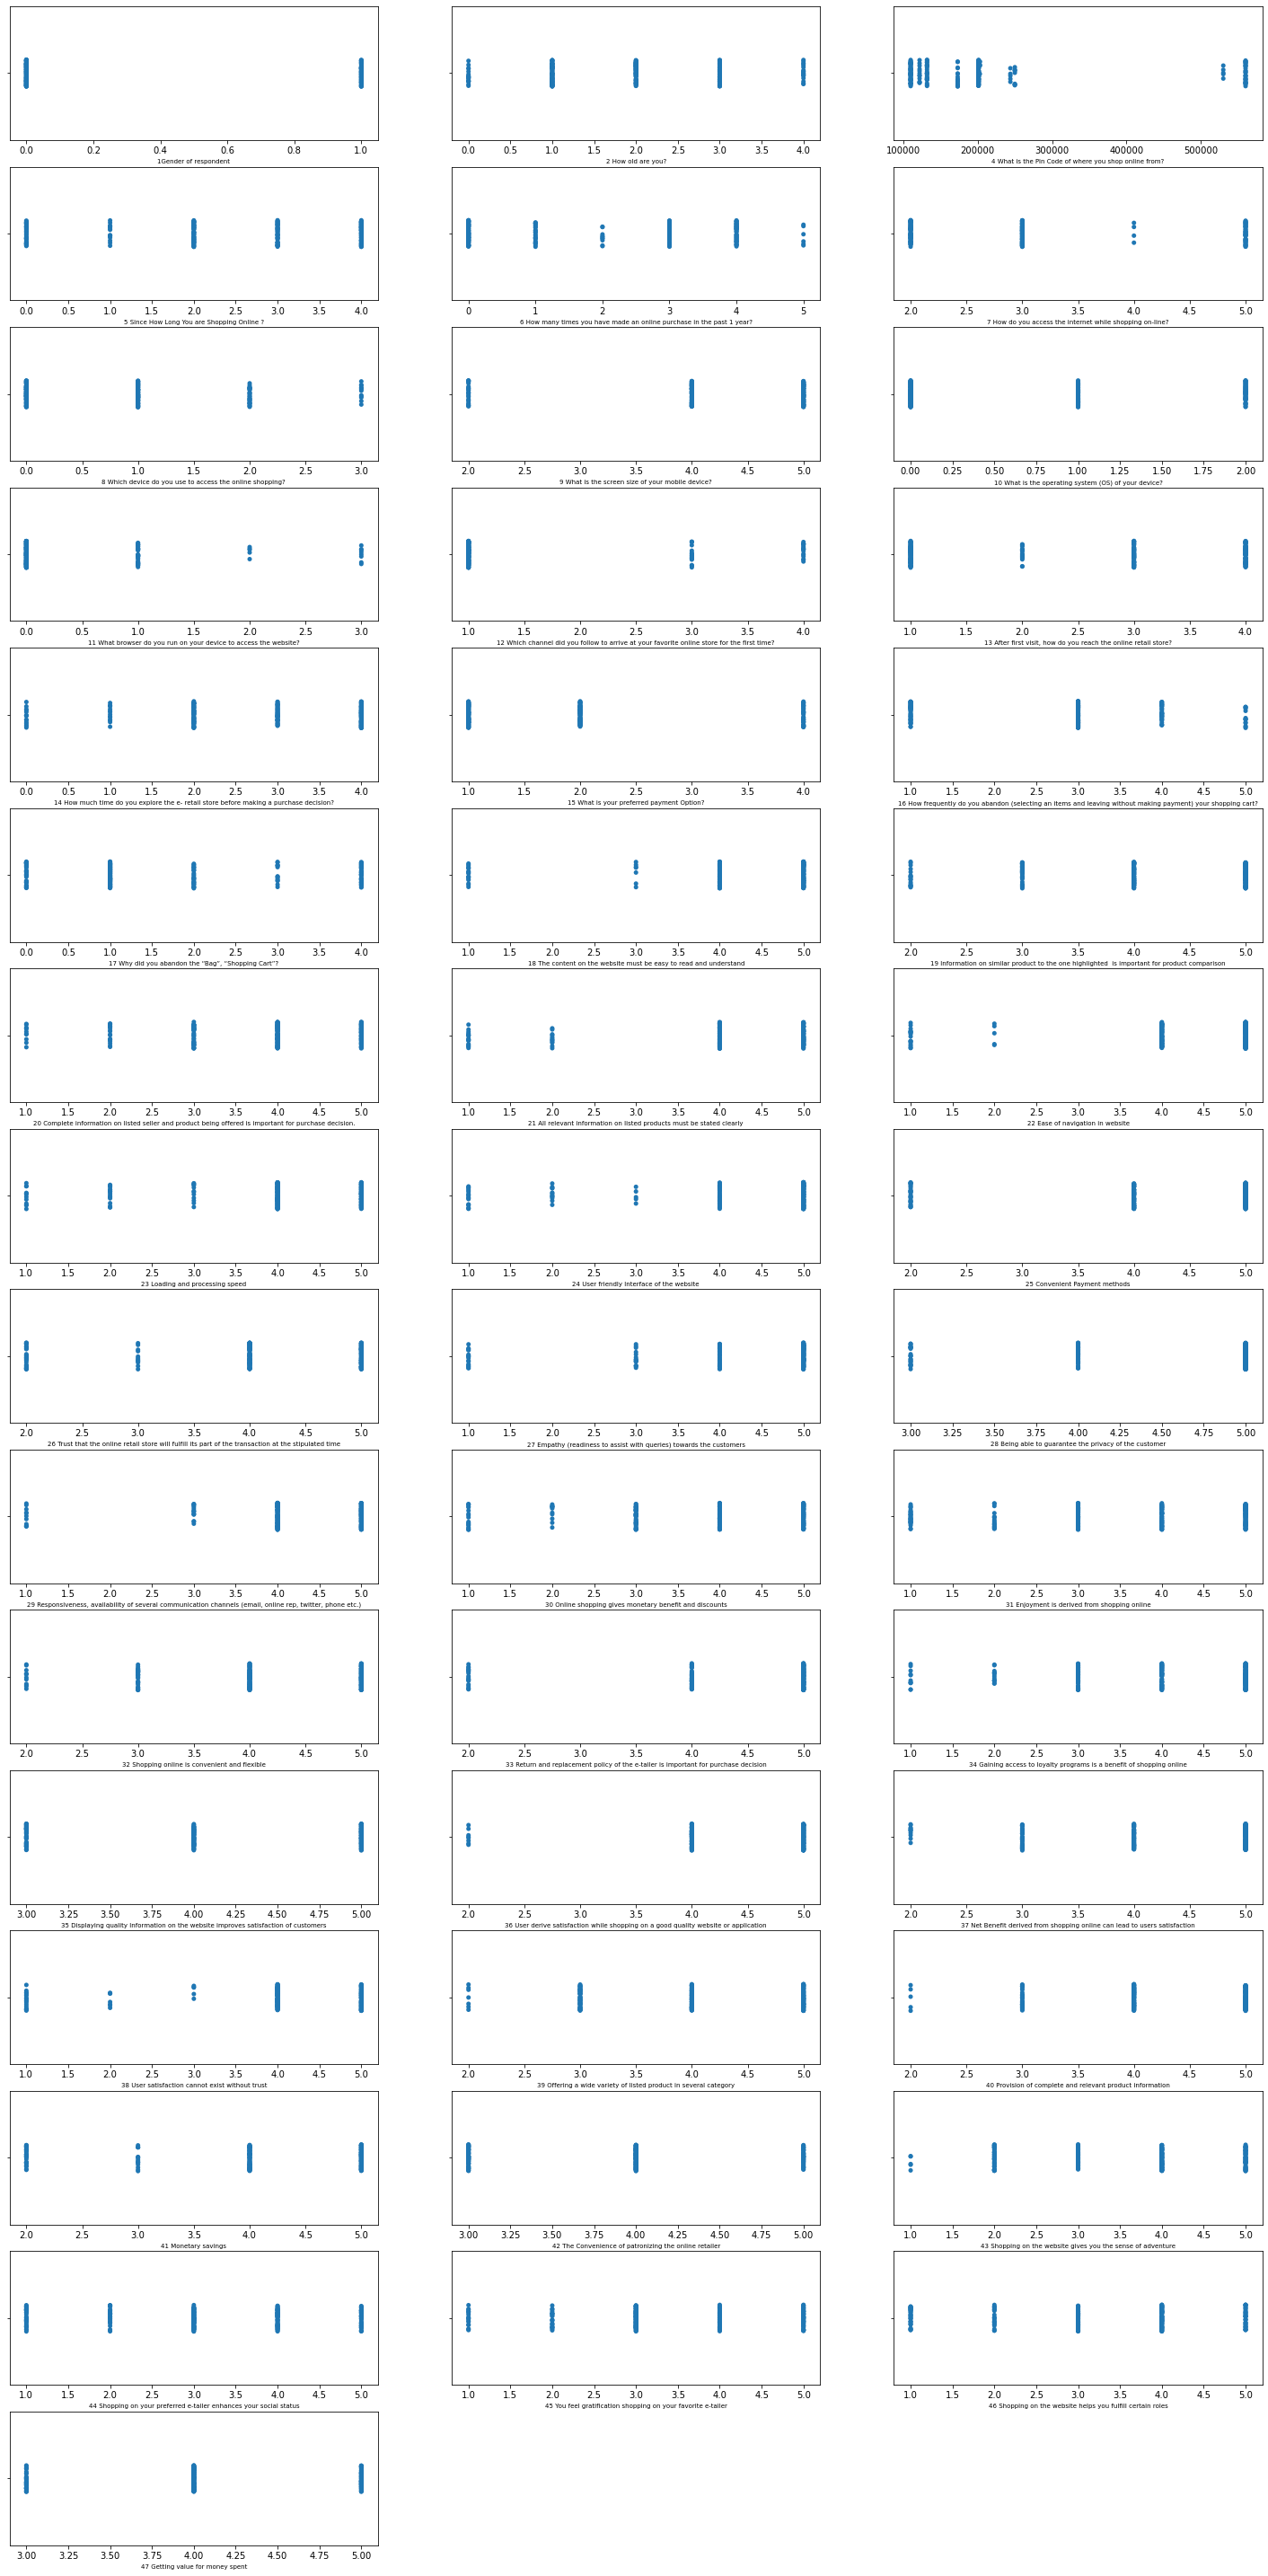

In [37]:
#ploting the strip plot to cross check the data distribution again
plt.figure(figsize=(25,52),facecolor='white')
pltnum=1

for column in df2:
    if pltnum <= 48:
        plt.subplot(16,3,pltnum)
        sns.stripplot(df2[column])
        plt.xlabel(column,fontsize=7)
        
    pltnum +=1
plt.show()    

In [ ]:
#the data is in numerical formet and not in continious format thats why its looks like line in every parameter.
#the distribution looks normal in strip plot.

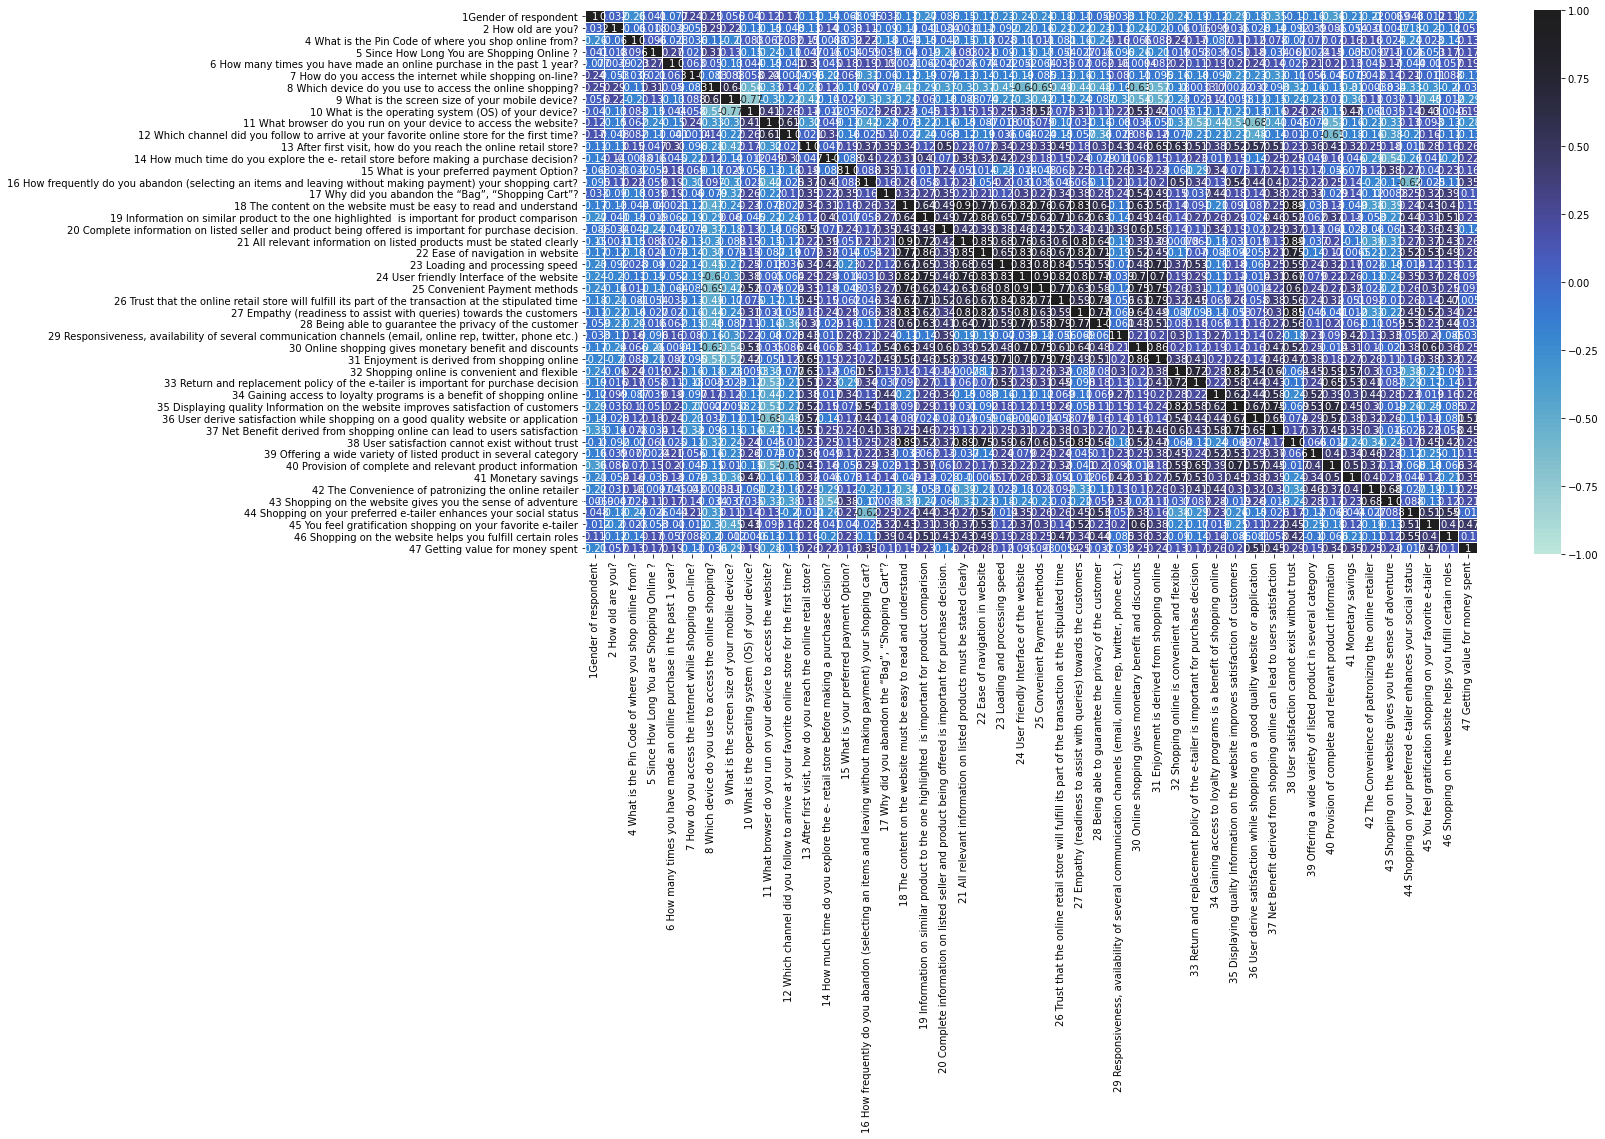

In [39]:
#now using the heatmap to check the multicolliniarity between the features.
corr=df2.abs().corr()

plt.figure(figsize=(20,10))

sns.heatmap(corr,vmin=-1,vmax=1,center=True,annot=True, fmt='.2g',linewidths=0.1)
plt.show()